In [15]:
import pandas as pd

df = pd.read_csv("../datasets/fertility.csv")
df

,Age,kidney diseases,Fasting Blood sugar,Uri infection,exercise habit,Frequency of alcohol consumption,Smoking habit,profession,#hours spent sitting per day,Diagnosis
0,30,no,80,yes,more than 3 months ago,once a week,occasional,engineer,16,Normal
1,35,yes,140,yes,less than 3 hours a week,once a week,daily,engineer,6,weak
2,27,yes,99,no,more than 3 months ago,hardly ever or never,never,engineer,9,Normal
3,32,no,96,yes,more than 3 months ago,hardly ever or never,never,engineer,7,Normal
4,30,yes,134,no,less than 3 hours a week,once a week,never,engineer,9,weak
...,...,...,...,...,...,...,...,...,...,...
134,31,no,90,no,more than 3 months ago,several times a week,daily,engineer,6,Normal
135,24,no,86,no,more than 3 months ago,several times a week,daily,engineer,6,Normal
136,28,no,91,no,more than 3 months ago,several times a week,daily,engineer,6,Normal
137,44,yes,89,no,more than 3 months ago,several times a week,daily,engineer,6,Normal


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

decisionTreeClf = DecisionTreeClassifier(
    criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=10)

naiveBayesClf = GaussianNB(var_smoothing=1e-09)

svcClf = SVC(C=0.1, degree=1, gamma=0.01, kernel='linear')

kNeighborsClf = KNeighborsClassifier(
    algorithm='brute', metric='manhattan', n_neighbors=19, weights='distance')

models = [(decisionTreeClf, ["exercise habit", "Age"]),
          (naiveBayesClf, ["exercise habit", "Fasting Blood sugar",
           "Frequency of alcohol consumption"]),
          (svcClf, ["exercise habit"]),
          (kNeighborsClf, ["Fasting Blood sugar", "Age",])
          ]

In [17]:
from sklearn.preprocessing import LabelEncoder

df['exercise habit'].replace('no exercise', 'no',inplace=True)

le = LabelEncoder()

for column in df.columns : 
  if df[column].dtype == "object" : 
    df[column] = le.fit_transform(df[column])

In [18]:
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split


X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, random_state=13, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(
    X, y, random_state=13, test_size=0.5)

X_train.shape[0], X_val.shape[0], X_test.shape[0],

(97, 69, 70)

In [20]:
from sklearn.metrics import accuracy_score
train_accuracies = []
test_accuracies = []
validation_accuracies = []
for model , features in models:
    model.fit(X_train[features], y_train)

    y_pred_train = model.predict(X_train[features])
    train_acc = accuracy_score(y_train, y_pred_train)

    y_pred_test = model.predict(X_test[features])
    test_acc = accuracy_score(y_test, y_pred_test)

    y_pred_val = model.predict(X_val[features])
    val_acc = accuracy_score(y_val, y_pred_val)

    train_accuracies.append(train_acc)
    validation_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

print(train_accuracies)
print(test_accuracies)
print(validation_accuracies)

[1.0, 0.9896907216494846, 0.9381443298969072, 0.9278350515463918]
[0.9714285714285714, 0.9428571428571428, 0.8142857142857143, 0.8714285714285714]
[1.0, 1.0, 0.9710144927536232, 0.9130434782608695]


In [21]:
# from sklearn.inspection import permutation_importance
# import matplotlib.pyplot as plt

# model_name = ["Decision Tree" , "GaussianNB" , "SVC" , "KNeighbors"]
# i = 0

# for model,_ in models:
#     # Compute permutation importance
#     result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
#     feature_importances = result.importances_mean
#     features = range(len(feature_importances))

#     # Get the feature names or column names
#     feature_names = df.columns[:-1]  # Replace with your feature names or column names

#     # Plot the feature importances with labels
#     plt.barh(features, feature_importances)
#     plt.yticks(features, feature_names)  # Use feature names for y-axis ticks
#     plt.xlabel('Importance Score')
#     plt.ylabel('Feature')
#     plt.title(f'Algorithm : {model_name[i]}')
#     plt.show()
#     i += 1


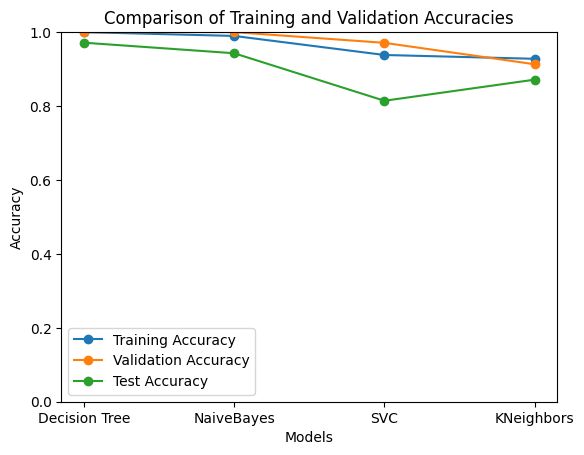

In [22]:
import matplotlib.pyplot as plt

clf = ["Decision Tree" , "NaiveBayes" , "SVC" , "KNeighbors"]

plt.plot(clf, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(clf, validation_accuracies, marker='o', label='Validation Accuracy')
plt.plot(clf, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Validation Accuracies')
plt.legend()
plt.ylim(0, 1)
plt.show()


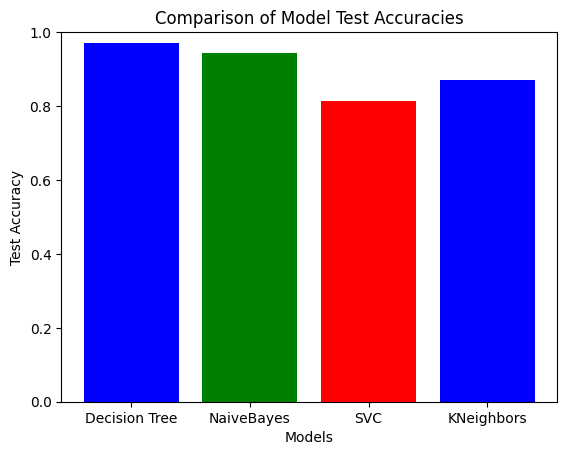

In [23]:
import matplotlib.pyplot as plt

# Assuming you have calculated test accuracies for each model
clf = ["Decision Tree" , "NaiveBayes" , "SVC" , "KNeighbors"]

# Plotting
plt.bar(clf, test_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracies')
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1 for accuracy percentage
plt.show()


In [24]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')

clf.fit(X_train,y_train)

clf

DummyClassifier(strategy='most_frequent')

In [25]:
y_pred_dummy = clf.predict(X_test)
y_pred_dummy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [26]:
from sklearn.metrics import accuracy_score
import numpy as np

random_prediction = np.random.randint(0,1,size=len(y_test))

accuracy = accuracy_score(y_test,random_prediction)
print("Accuracy :",accuracy)

Accuracy : 0.6142857142857143
